# EDA 
Perform EDA with the goal to identify cleaning and pre-processing steps that will be applied in the next notebook. A summary of the identified issues is documented in the last section of this notebook.


**Acknowledgements**

- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://towardsdatascience.com/modeling-price-with-regularized-linear-model-xgboost-55e59eae4482

(And here is another interesting [blogpost](https://medium.com/diogo-menezes-borges/project-2-predicting-house-prices-on-kaggle-989f1b0c4ef6) on the project, that does some better NaN imputation and combines lasso regression with XGBoost directly.)

**Data Sources**

- `data/raw/train.csv`: Training set from [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

**Changes**

- 2019-03-09: Start project
- 2019-03-21: Finish EDA


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries,-load-data" data-toc-modified-id="Import-libraries,-load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries, load data</a></span></li><li><span><a href="#Assess-basic-data-structure" data-toc-modified-id="Assess-basic-data-structure-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assess basic data structure</a></span></li><li><span><a href="#Explore-Target-Variable" data-toc-modified-id="Explore-Target-Variable-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore Target Variable</a></span><ul class="toc-item"><li><span><a href="#Advanced-Analysis-of-Target-Variable" data-toc-modified-id="Advanced-Analysis-of-Target-Variable-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Advanced Analysis of Target Variable</a></span></li><li><span><a href="#Pre-processing-of-target-variable" data-toc-modified-id="Pre-processing-of-target-variable-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Pre-processing of target variable</a></span></li></ul></li><li><span><a href="#Explore-Numeric-Features" data-toc-modified-id="Explore-Numeric-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore Numeric Features</a></span></li><li><span><a href="#Explore-Categorical-Features" data-toc-modified-id="Explore-Categorical-Features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore Categorical Features</a></span></li><li><span><a href="#Explore-Correlations" data-toc-modified-id="Explore-Correlations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Explore Correlations</a></span><ul class="toc-item"><li><span><a href="#Numeric-Features-to-Target-Variable" data-toc-modified-id="Numeric-Features-to-Target-Variable-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Numeric Features to Target Variable</a></span></li><li><span><a href="#Categorical-Features-to-Target-Variable" data-toc-modified-id="Categorical-Features-to-Target-Variable-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Categorical Features to Target Variable</a></span></li></ul></li><li><span><a href="#Missing-Data-(in-greater-Detail)" data-toc-modified-id="Missing-Data-(in-greater-Detail)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Missing Data (in greater Detail)</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Check-Features-for-Skewedness" data-toc-modified-id="Check-Features-for-Skewedness-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Check Features for Skewedness</a></span></li><li><span><a href="#Document-necessary-Cleaning-Steps" data-toc-modified-id="Document-necessary-Cleaning-Steps-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Document necessary Cleaning Steps</a></span></li></ul></div>

---

## Import libraries, load data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from tqdm import tqdm

from scipy import stats
from scipy.stats import norm, skew

# My functions
import EDA_functions as EDA
import cleaning_functions as cleaning

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns #, sns.set_style('whitegrid')
color = 'rebeccapurple'
%matplotlib inline

# Display settings
from IPython.display import display
pd.options.display.max_columns = 100

In [2]:
# Load data
raw_data = pd.read_csv('data/raw/train.csv')

## Assess basic data structure

In [3]:
print(raw_data.shape)
display(raw_data.head())

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

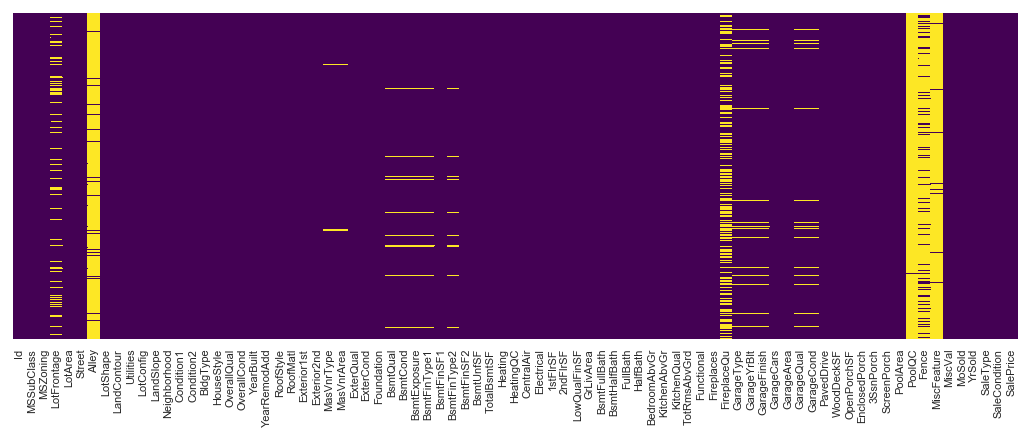

In [5]:
# Quick-check for missing data
cleaning.plot_NaN(raw_data)

In [6]:
# Remove all cols with more than 40% NaN - makes visual EDA a little bit easier
reduced_data = raw_data[[col for col in raw_data if raw_data[col].count() / len(raw_data) >= 0.6]]

# Remove Id col, as it is of no use for us
reduced_data = reduced_data.copy().drop('Id', axis=1)

# display removed columns
cols_to_del = list(set(raw_data.columns).difference(set(reduced_data.columns)))
print("removed columns: ", cols_to_del)

# safety_check
assert reduced_data.shape[1] == raw_data.shape[1] - len(cols_to_del)

removed columns:  ['MiscFeature', 'PoolQC', 'FireplaceQu', 'Alley', 'Id', 'Fence']


In [7]:
# check for categorical dtypes
data_object = reduced_data.select_dtypes(object)

for col in data_object:
    print(str(col), data_object[col].nunique())

MSZoning 5
Street 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
SaleType 9
SaleCondition 6


In [8]:
# Change objects to categoricals, id to object
reduced_data = cleaning.change_dtypes(reduced_data.copy(), cols_to_category=data_object.columns, 
                              cols_to_object=['Id'])

'Id not found'

In [9]:
# Check
print('number of cat features: ', 
      reduced_data.select_dtypes(include = 'category').shape[1])

number of cat features:  38


## Explore Target Variable

In [10]:
reduced_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

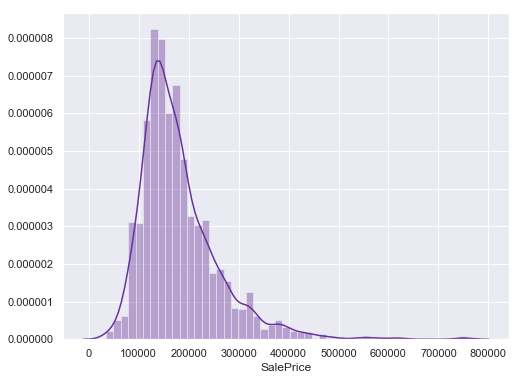

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(reduced_data['SalePrice'], color=color);

In [12]:
#check skewness and kurtosis
print("Skewness: %f" % reduced_data['SalePrice'].skew())
print("Kurtosis: %f" % reduced_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Observations:**
- Deviates from the normal distribution
- Has positive skewness
- Shows peakedness

### Advanced Analysis of Target Variable


 mu = 180921.20, sigma = 79415.29



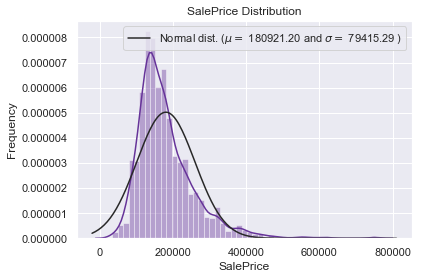

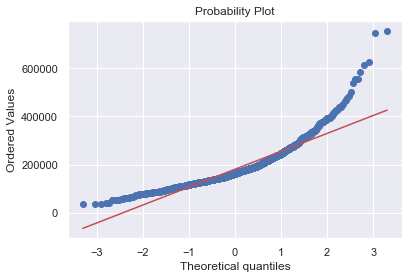

In [13]:
# Display price with added normal distribution
sns.distplot(reduced_data['SalePrice'] , fit=norm, color=color);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(reduced_data['SalePrice'])
print( '\n mu = {:.2f}, sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Get additional QQ-plot
fig = plt.figure()
res = stats.probplot(reduced_data['SalePrice'], plot=plt)
plt.show();

**Need for pre-processing:**
As linear models like normally distributed data, SalePrice will be log-transformed to make it more normally distributed.

### Pre-processing of target variable

In [14]:
# transform with natural log
reduced_data = cleaning.apply_log(reduced_data.copy(), cols_to_transform=['SalePrice'])


 mu = 12.02, sigma = 0.40



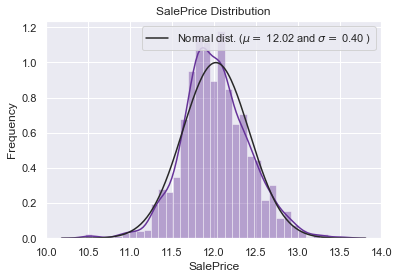

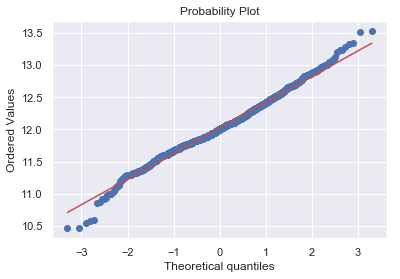

In [15]:
# Re-display transformed price
sns.distplot(reduced_data['SalePrice'] , fit=norm, color=color);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(reduced_data['SalePrice'])
print( '\n mu = {:.2f}, sigma = {:.2f}\n'.format(mu, sigma))

# Plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Get additional QQ-plot
fig = plt.figure()
res = stats.probplot(reduced_data['SalePrice'], plot=plt)
plt.show();

## Explore Numeric Features

In [16]:
data_num = reduced_data.select_dtypes(['int64', 'float64'])
print("number of numeric features: ", data_num.shape[1])

number of numeric features:  37


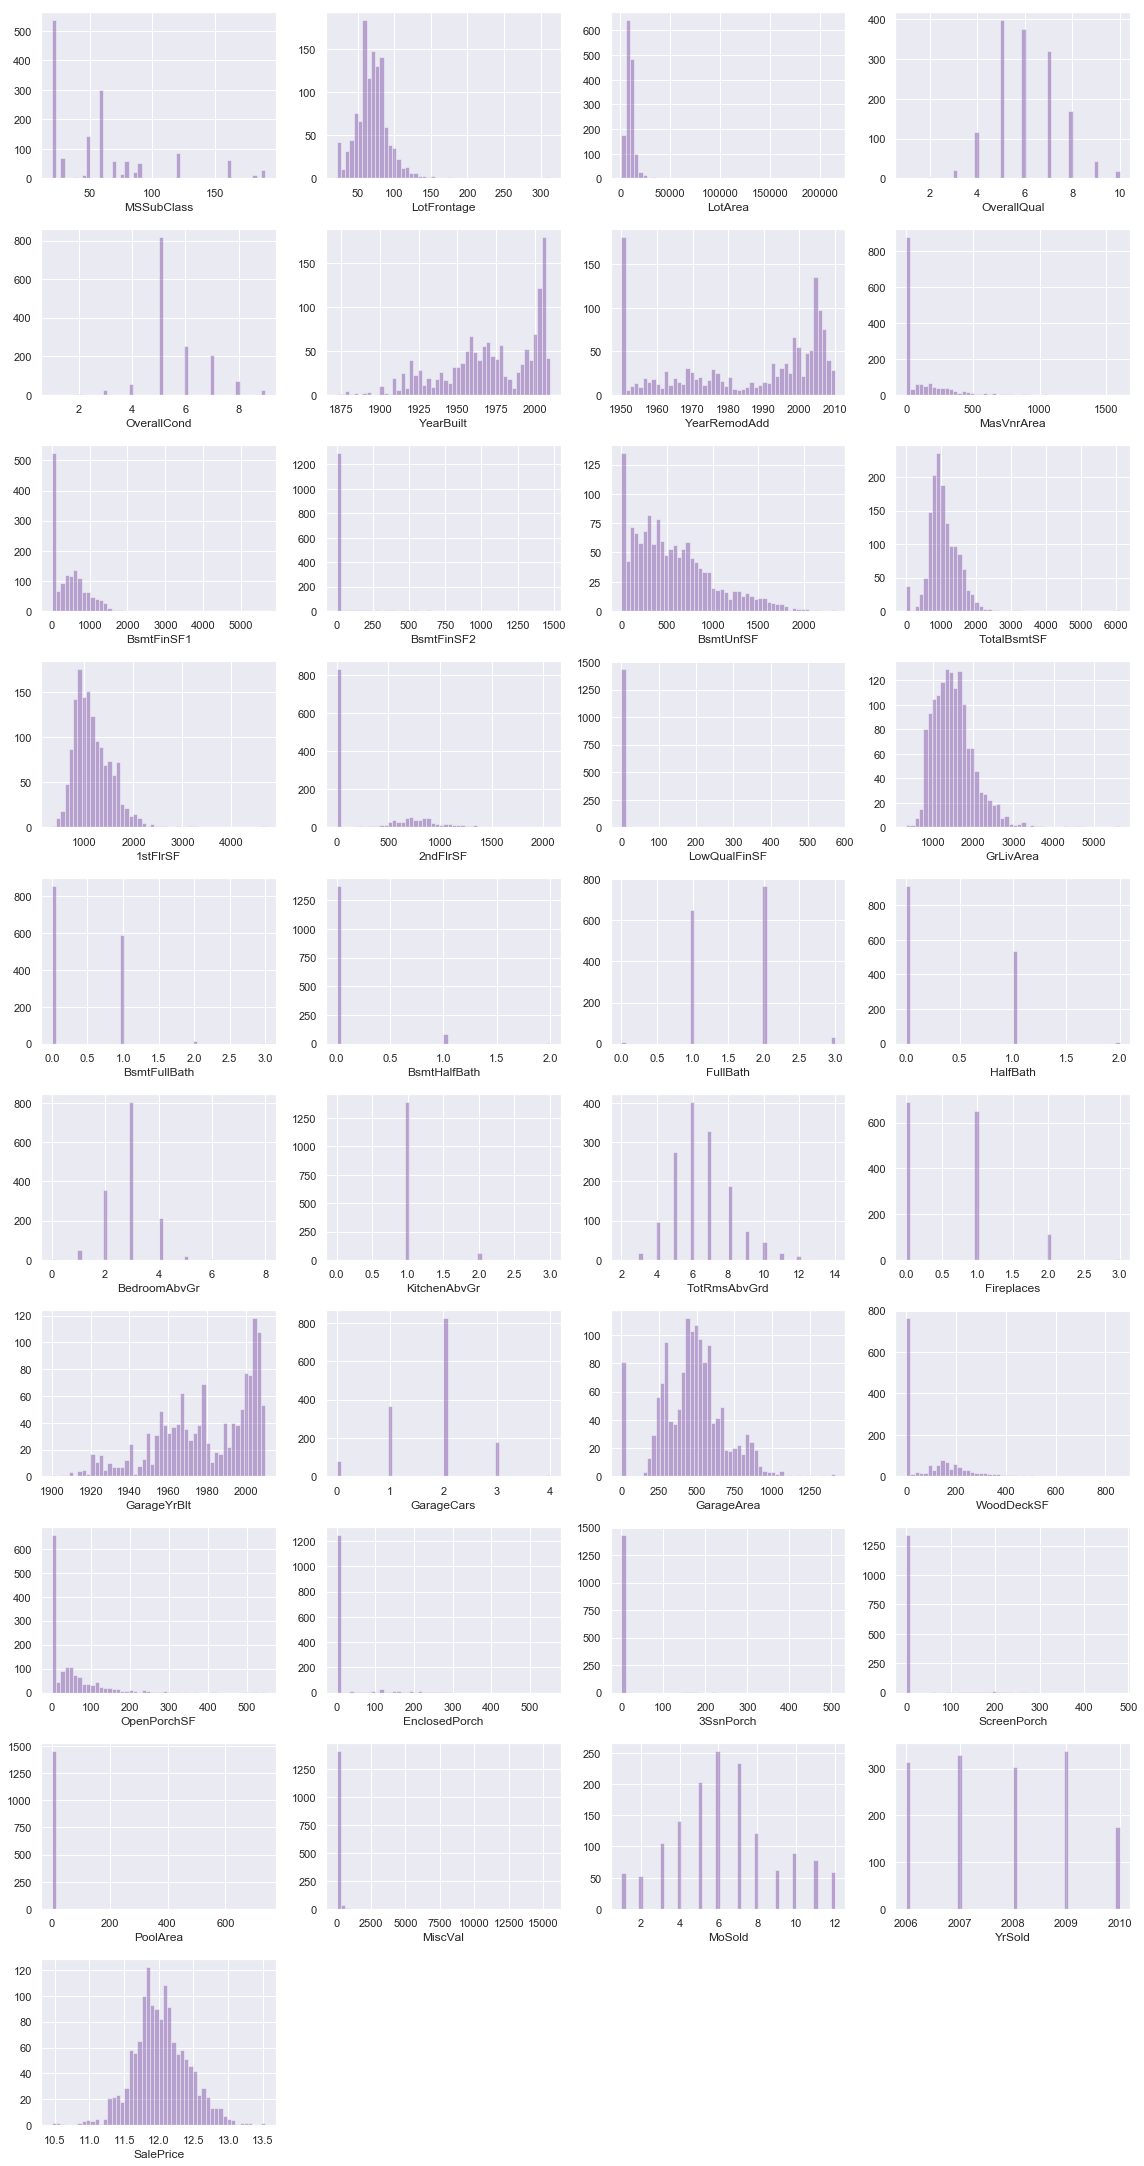

In [17]:
EDA.plot_num_hist(data_num, kde=False, figsize=(16,30))

## Explore Categorical Features

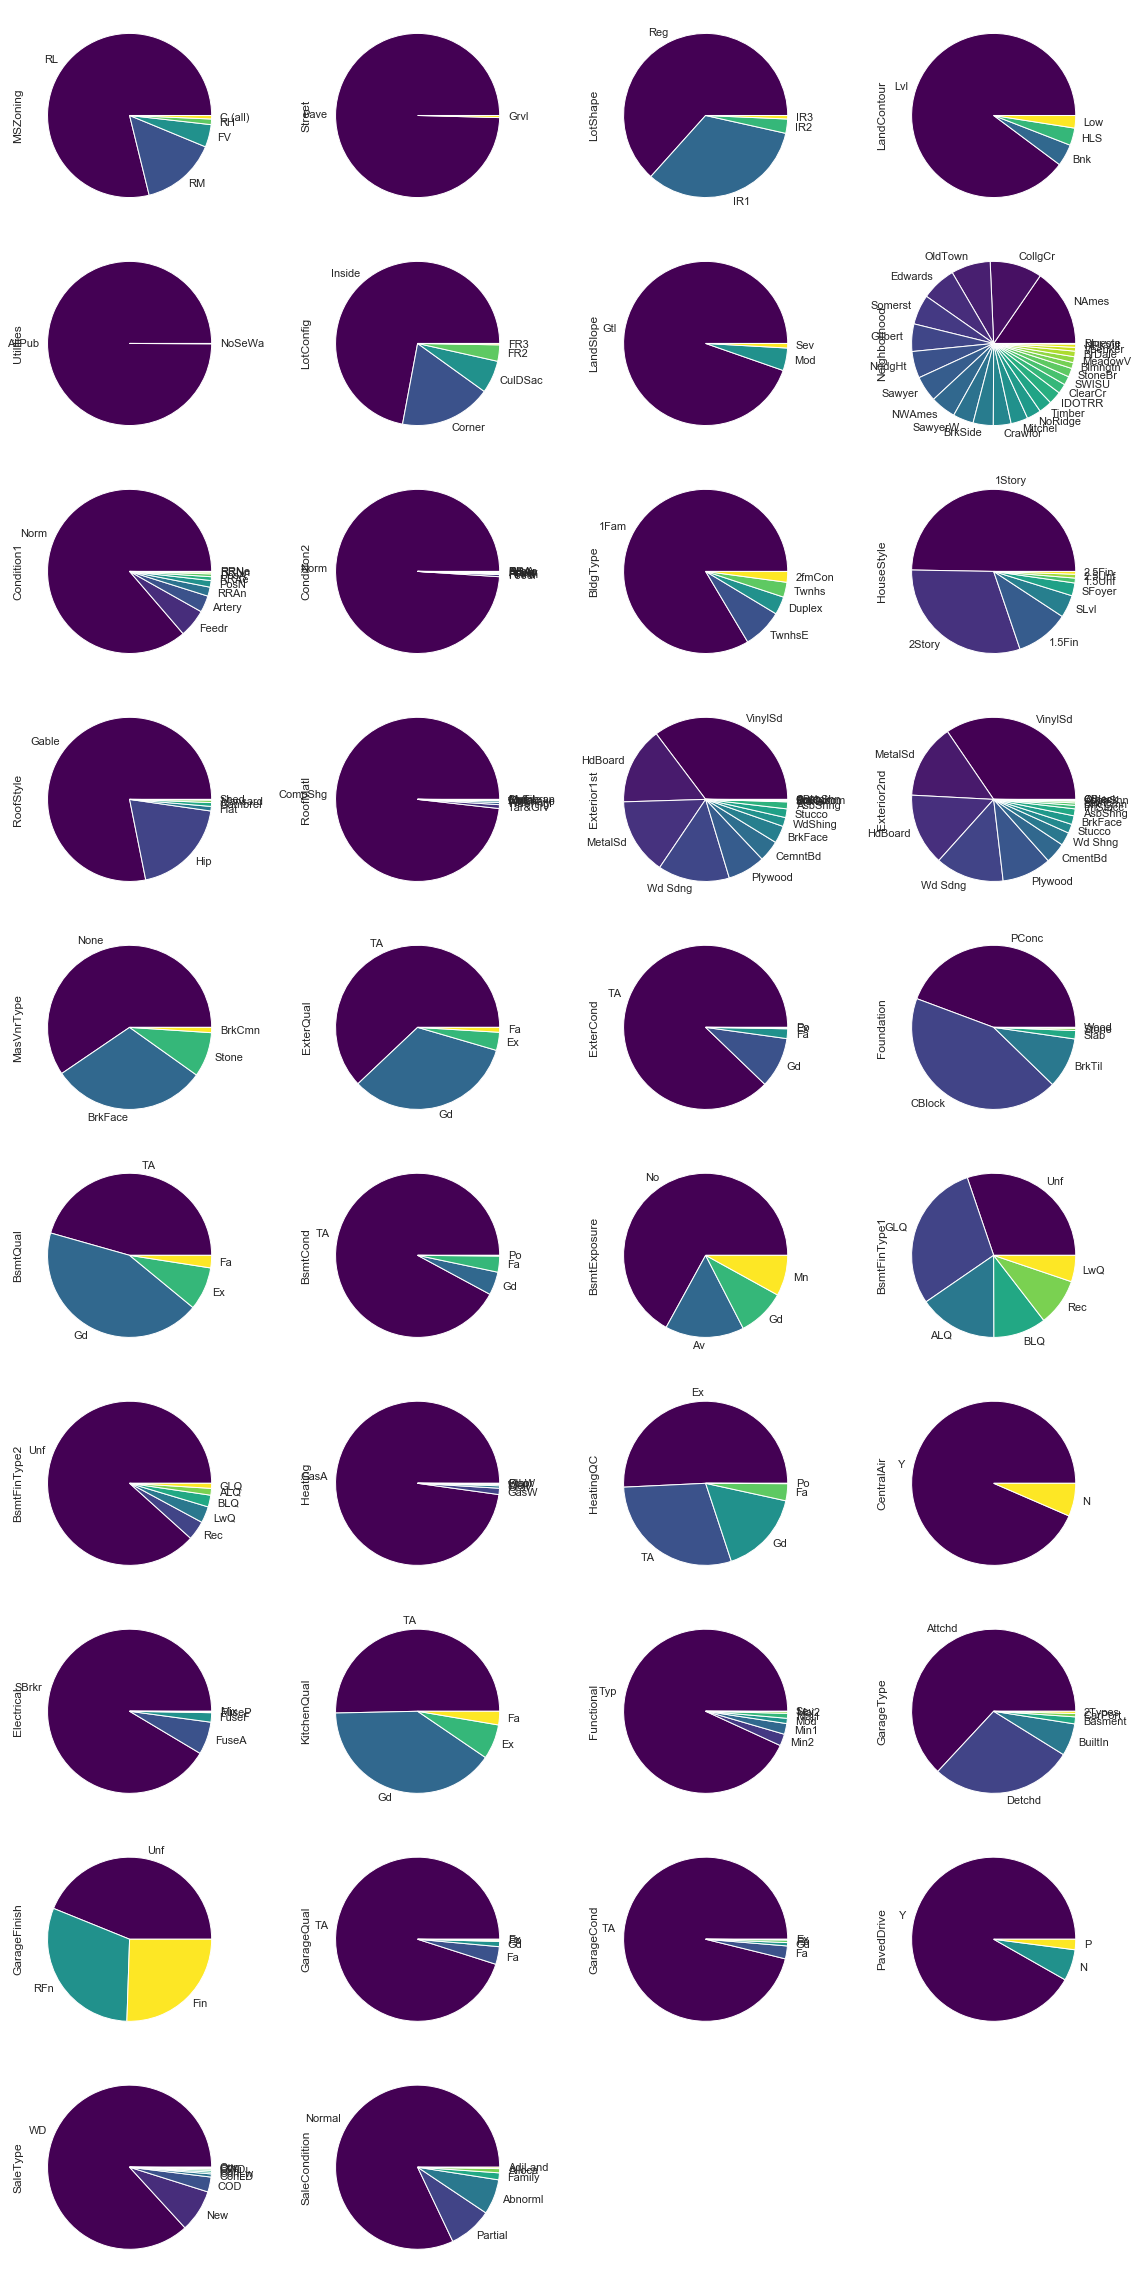

In [18]:
EDA.plot_cat_pies(reduced_data, figsize=(16, 32))

## Explore Correlations

### Numeric Features to Target Variable

In [19]:
num_corr_dict = {}

for feat in data_num.iloc[:, :-1]:
    target_corr = data_num[['SalePrice', feat]].corr().iloc[0,1]
    num_corr_dict[feat] = target_corr
    
sorted(num_corr_dict.items(), key=lambda x: x[1], reverse=True) # output sorted by value

[('OverallQual', 0.8171844179216822),
 ('GrLivArea', 0.7009266525441293),
 ('GarageCars', 0.6806248074360439),
 ('GarageArea', 0.6508875559020062),
 ('TotalBsmtSF', 0.6121339753697865),
 ('1stFlrSF', 0.596981045034374),
 ('FullBath', 0.5947705420075314),
 ('YearBuilt', 0.5865702403842262),
 ('YearRemodAdd', 0.5656078325911801),
 ('GarageYrBlt', 0.541072862595876),
 ('TotRmsAbvGrd', 0.5344222037231195),
 ('Fireplaces', 0.48944942759848153),
 ('MasVnrArea', 0.43080852419510485),
 ('BsmtFinSF1', 0.3720230735670904),
 ('LotFrontage', 0.3558784703859834),
 ('WoodDeckSF', 0.3341350739575136),
 ('OpenPorchSF', 0.3210529720197666),
 ('2ndFlrSF', 0.3192999843472038),
 ('HalfBath', 0.3139822499151441),
 ('LotArea', 0.25731989235273833),
 ('BsmtFullBath', 0.2362241088243532),
 ('BsmtUnfSF', 0.22198505352520953),
 ('BedroomAbvGr', 0.20904368212692215),
 ('ScreenPorch', 0.12120760489686298),
 ('PoolArea', 0.06979780600969131),
 ('MoSold', 0.05732948459791035),
 ('3SsnPorch', 0.05490022646761992),
 

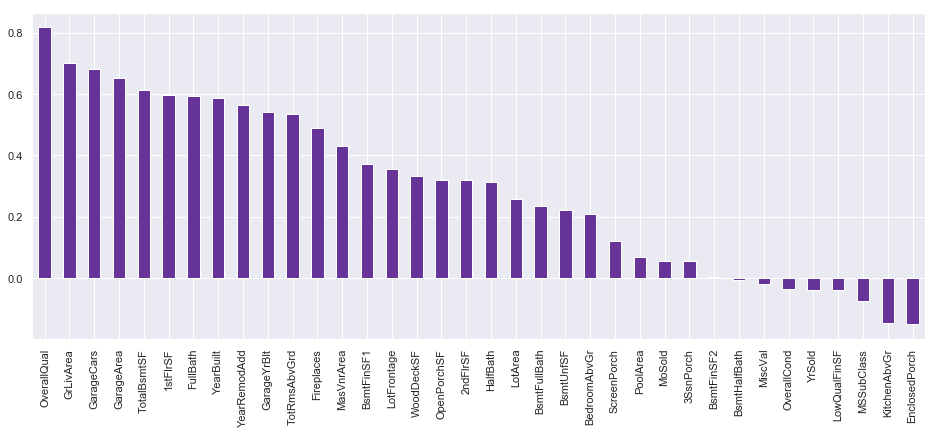

In [20]:
# Simpler approach, including visualization - NOTE: I included this in EDA functions afterwards
corr_target_series = data_num.corr()['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(16,6))
corr_target_series.drop("SalePrice").plot.bar(color=color)
plt.show();

In [21]:
# Check for number of features with absolute corr of >= 0.2
corr_features = [x for x, y in num_corr_dict.items() if np.abs(y) >= 0.2]
print('number of numeric features with absolute corr => 0.2: ', len(corr_features))

number of numeric features with absolute corr => 0.2:  23


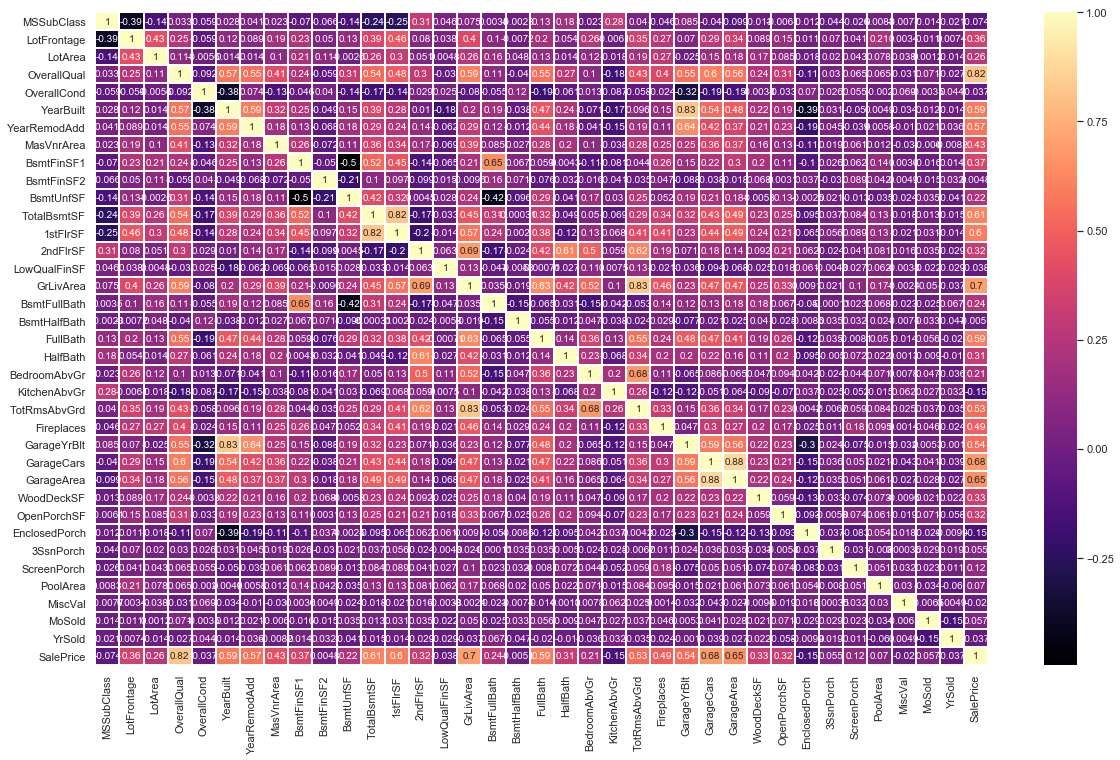

In [22]:
EDA.plot_corr_map_num_all(data_num, cmap='magma', figsize=(20,12))

**Observation:** 4 feature pairs with corr > 0.8. Sign for multicollinearity. Taking into account the corr to the target variable I will possibly remove cols: '1stFlrSF', 'GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt'. (But I will first see how ElasticNet handles those features and if it will remove the redundancy.)

### Categorical Features to Target Variable 

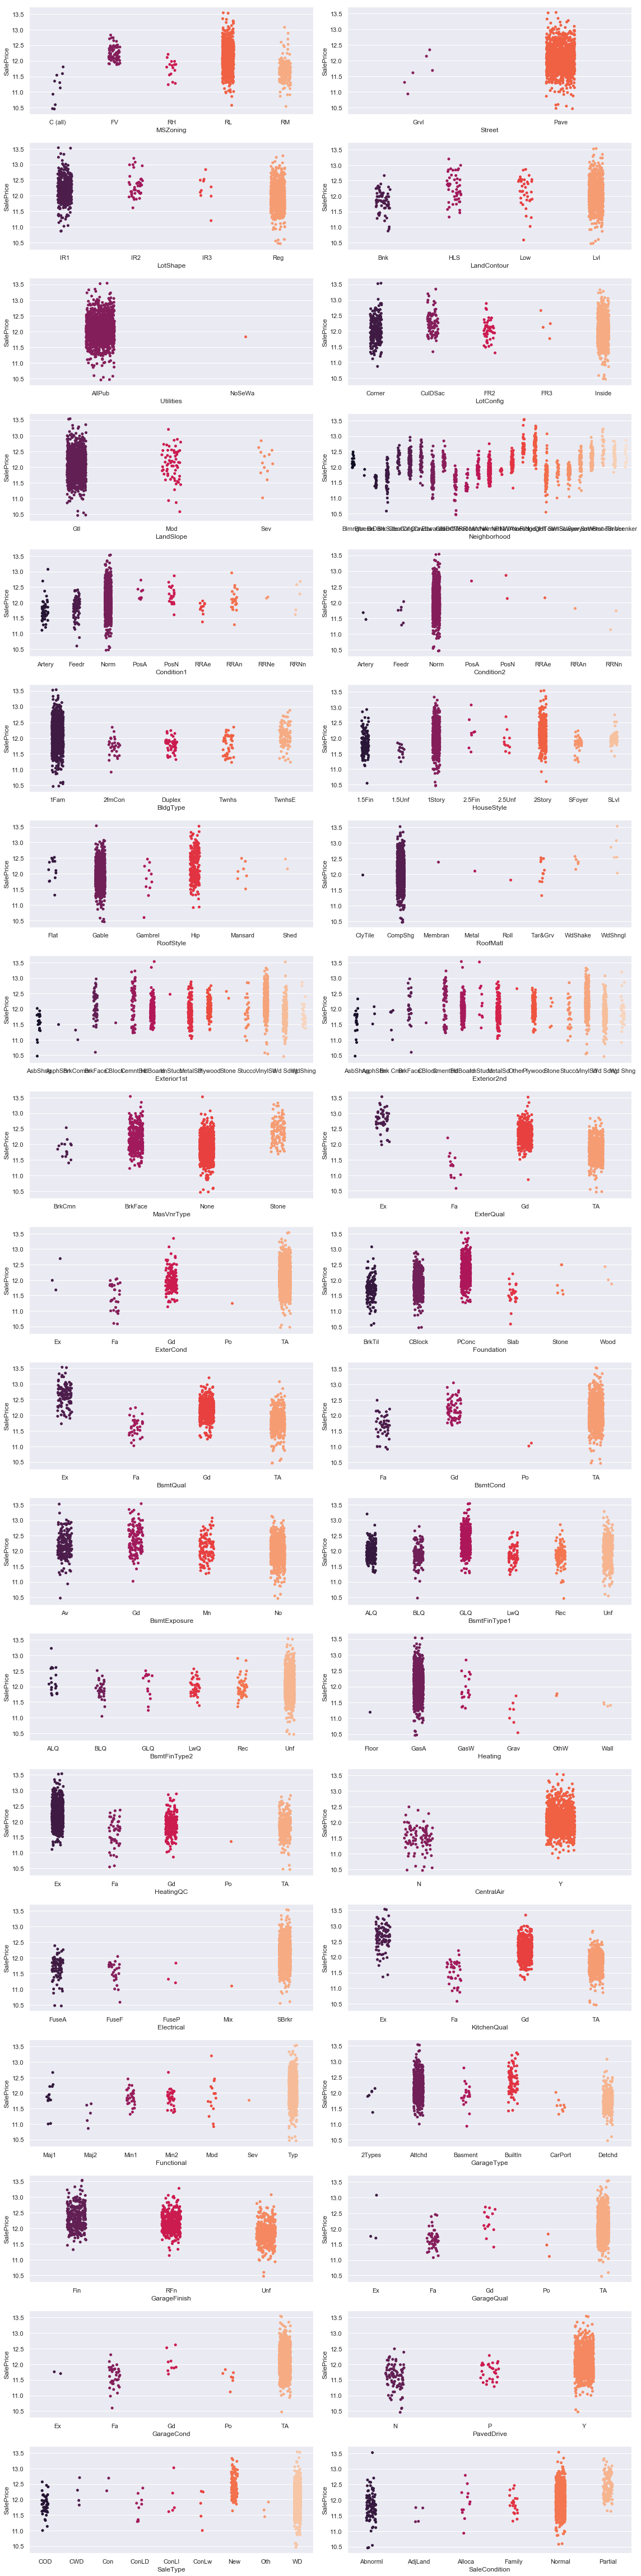

In [23]:
EDA.plot_corr_strip_cat_target(reduced_data, 'SalePrice', figsize=(16, 64))

**Observation:** There are some clear features that seem to have a clear value to the model (for example most of those related to some sort of 'Qual'), but sometimes some of the classes are much to imbalanced to be of much help.

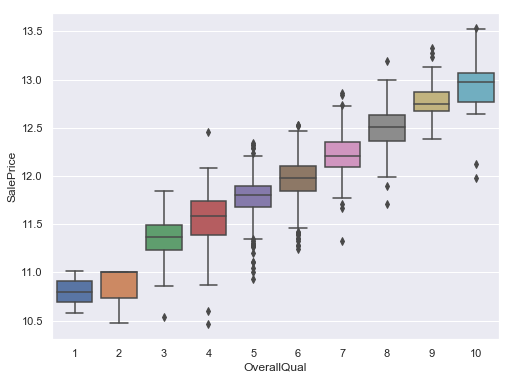

In [24]:
# Example of clear relationship: OverallQual to SalePrice
corr_col = 'OverallQual'
df_box = pd.concat([reduced_data['SalePrice'], reduced_data[corr_col]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=corr_col, y="SalePrice", data=df_box);

## Missing Data (in greater Detail)

Important questions when thinking about missing data:
- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hiding an inconvenient truth.

In [25]:
# Analyze Missing Data (from original set)
cleaning.list_NaN(raw_data)

,total,percent,dtype
PoolQC,1453,99.5,object
MiscFeature,1406,96.3,object
Alley,1369,93.8,object
Fence,1179,80.8,object
FireplaceQu,690,47.3,object
LotFrontage,259,17.7,float64
GarageType,81,5.5,object
GarageYrBlt,81,5.5,float64
GarageFinish,81,5.5,object
GarageQual,81,5.5,object


**Decisions / Need for cleaning:**

- the first 5 cols have already been added to cols_to_del
- ´LotFrontage´ will probably be deleted too (maybe try alternative imputation strategies)
- Basement-related cols will probably be deleted (as there are others of them in the numeric section, that will remain)
- Same is true for the Garage-related cols
- ´MasVnrArea´, ´MasVnrType´, ´Electrical´: so few missing observations, that only those will be deleted.

## Outliers

In [26]:
cleaning.count_outliers_IQR_method(data_num, IQR_dist=1.5)

MSSubClass
Identified outliers: 103
Percentage of outliers: 7.1%

LotFrontage
Identified outliers: 88
Percentage of outliers: 6.0%

LotArea
Identified outliers: 69
Percentage of outliers: 4.7%

OverallQual
Identified outliers: 2
Percentage of outliers: 0.1%

OverallCond
Identified outliers: 125
Percentage of outliers: 8.6%

YearBuilt
Identified outliers: 7
Percentage of outliers: 0.5%

MasVnrArea
Identified outliers: 96
Percentage of outliers: 6.6%

BsmtFinSF1
Identified outliers: 7
Percentage of outliers: 0.5%

BsmtFinSF2
Identified outliers: 167
Percentage of outliers: 11.4%

BsmtUnfSF
Identified outliers: 29
Percentage of outliers: 2.0%

TotalBsmtSF
Identified outliers: 61
Percentage of outliers: 4.2%

1stFlrSF
Identified outliers: 20
Percentage of outliers: 1.4%

2ndFlrSF
Identified outliers: 2
Percentage of outliers: 0.1%

LowQualFinSF
Identified outliers: 26
Percentage of outliers: 1.8%

GrLivArea
Identified outliers: 31
Percentage of outliers: 2.1%

BsmtFullBath
Identified outli

In [27]:
# Get list of columns with target correlation > 0.5 (including target)
top_corr_columns = list(corr_target_series.loc[corr_target_series > 0.5].index)
display(top_corr_columns)

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'TotRmsAbvGrd']

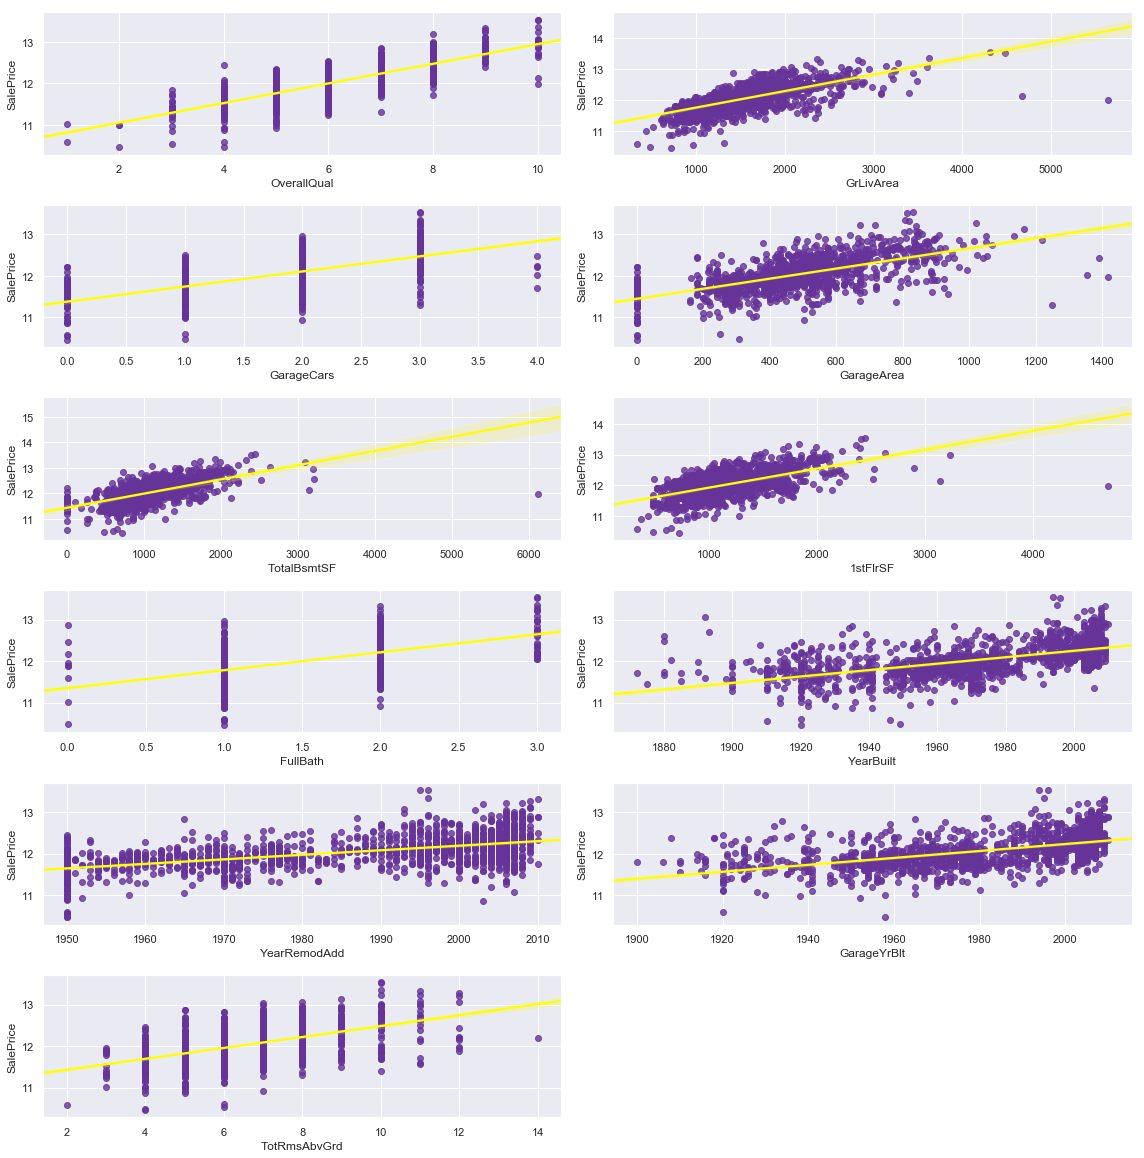

In [28]:
# Inspect outliers for most important columns
EDA.plot_corr_regression_num_target(data_num[top_corr_columns], 'SalePrice')

**Observations:**
There seem only to be a handfull of outliers that are massively not in the trend of the data. I will try to single them out. (Note: GarageArea will be removed.)

In [29]:
outliers_to_del = []
outliers_to_del.append(list(data_num.sort_values(['GrLivArea'], ascending=False).head(2).index))
outliers_to_del.append(list(data_num.sort_values(['TotRmsAbvGrd'], ascending=False).head(1).index))
outliers_to_del.append(list(data_num.sort_values(['TotRmsAbvGrd'], ).head(1).index))
# Flatten list
outliers_to_del = [item for sublist in outliers_to_del for item in sublist]

# Check result
print(outliers_to_del)

[1298, 523, 635, 533]


In [30]:
data_outliers = data_num.drop(outliers_to_del)
assert len(data_outliers) == len(data_num) - len(outliers_to_del)

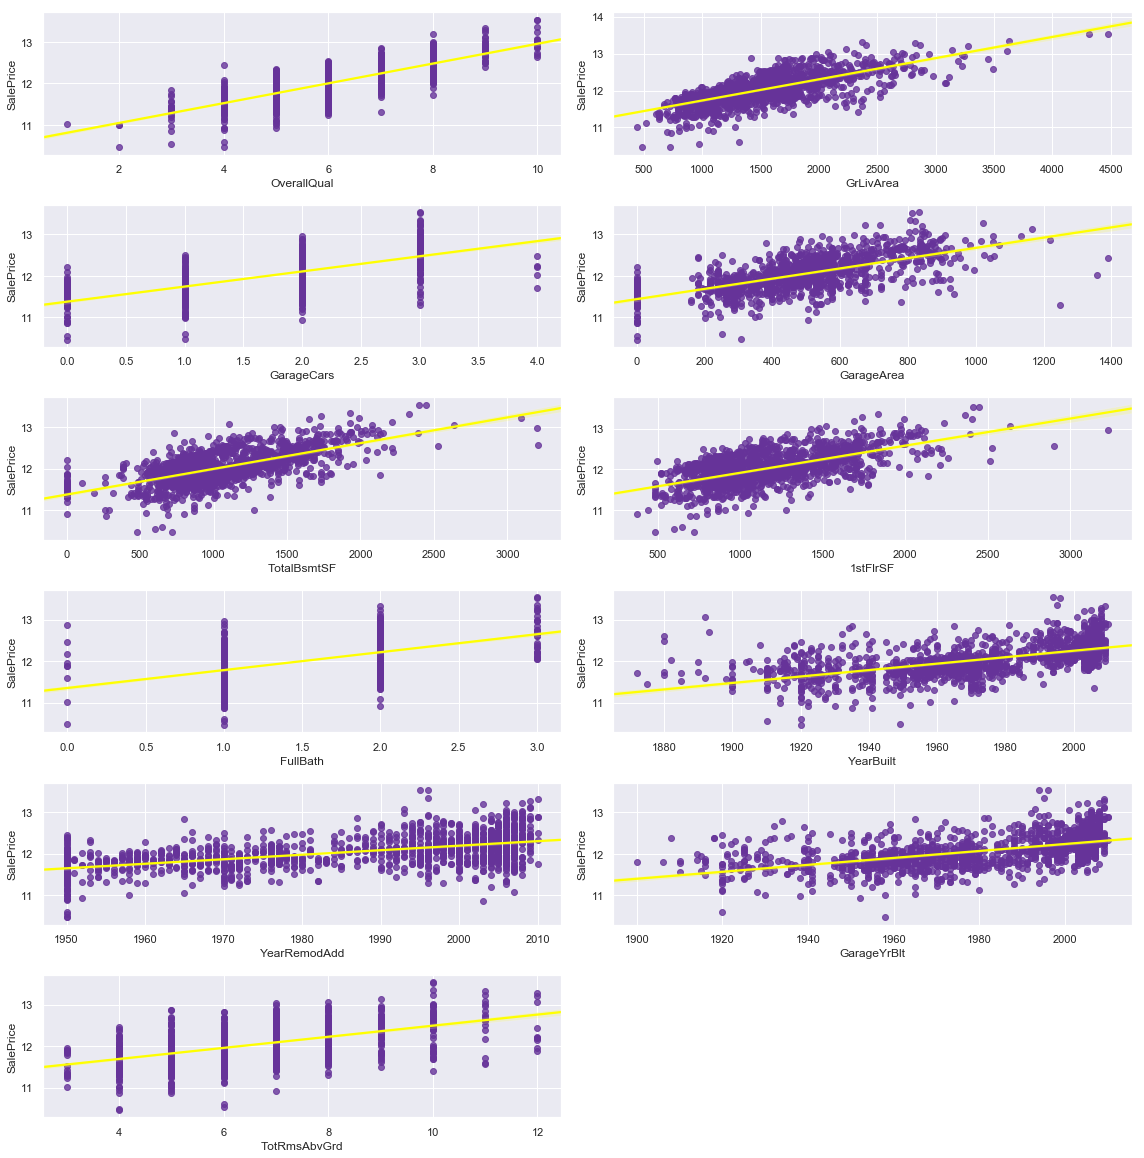

In [31]:
# Inspect outliers for most important columns
EDA.plot_corr_regression_num_target(data_outliers[top_corr_columns], 'SalePrice')

**Decision:** I will start by removing this four rows. An alternative could be to remove all outliers in the important cols with IQR-Range > 1.5 or so.

## Check Features for Skewedness

In [32]:
# Print skew factor for numeric columns

skewed_features = data_num.apply(lambda x: skew(x.dropna())) #compute skewness
print(skewed_features.sort_values(ascending=False))


MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.666326
OpenPorchSF       2.361912
LotFrontage       2.160866
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
SalePrice         0.121210
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.648708
d

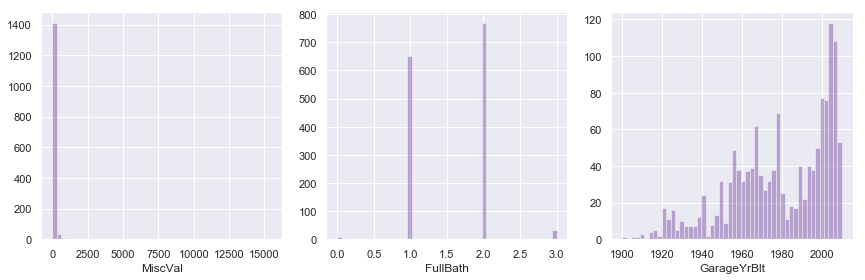

In [33]:
# Plot some of The cols
EDA.plot_num_hist(data_num[['MiscVal', 'FullBath', 'GarageYrBlt']], kde=False, figsize=(16,4))

In [63]:
# Fix skew for values > 0.75
skewed_features = skewed_features.loc[skewed_features > 0.75]
cols_to_log = skewed_features.index
reduced_data[cols_to_log] = np.log1p(reduced_data[cols_to_log])

C:\Users\r2d4\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in log1p


In [64]:
# Check results
display(reduced_data[cols_to_log].head())

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0.416647,0.417802,0.457633,0.431192,0.442570,0.0,0.428322,0.444012,0.444012,0.443994,0.0,0.448746,0.000000,0.264033,0.000000,0.416888,0.000000,0.0,0.0,0.0,0.0
1,0.397110,0.420665,0.458247,0.000000,0.444975,0.0,0.434853,0.446747,0.446747,0.000000,0.0,0.446747,0.264033,0.264033,0.435303,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.416647,0.418440,0.458993,0.429169,0.439599,0.0,0.438649,0.444536,0.444536,0.444097,0.0,0.449022,0.000000,0.264033,0.000000,0.411115,0.000000,0.0,0.0,0.0,0.0
3,0.418845,0.416647,0.458222,0.000000,0.432185,0.0,0.440462,0.443089,0.444850,0.443089,0.0,0.448772,0.000000,0.264033,0.000000,0.408016,0.434444,0.0,0.0,0.0,0.0
4,0.416647,0.421312,0.460075,0.436771,0.441993,0.0,0.439667,0.446082,0.446082,0.445498,0.0,0.450313,0.000000,0.264033,0.430978,0.421312,0.000000,0.0,0.0,0.0,0.0


## Document necessary Cleaning Steps

Will be (re-)performed in next notebooks

- remove all cols in 'cols_to_del'
- change all 'object' columns to 'category'
- watch multicollinearity (evtl. remove cols: '1stFloor', 'GarageArea', 'FirstFlSF')
- try different strategies for cols with many missing values
- remove all rows in 'outliers_to_del', test IQR-method on 'top_corr_columns' as alternative
- log transform cols in 'cols_to_log', log transform target variable (Section 3.2)
- One-hot-encode categorical features

In [66]:
# Append target val to cols_to_log (was already log-transformed)
cols_to_log = cols_to_log.tolist()
cols_to_log.append('SalePrice')

# Check result
print(cols_to_log)

['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


In [67]:
%store cols_to_del
%store cols_to_log
%store outliers_to_del
%store top_corr_columns

Stored 'cols_to_del' (list)
Stored 'cols_to_log' (list)
Stored 'outliers_to_del' (list)
Stored 'top_corr_columns' (list)


---